In [1]:
!pip install -q gensim==4.3.3 nltk==3.9.1 matplotlib==3.9.0 scikit-learn==1.5.1

In [2]:
import gensim, nltk, matplotlib, sklearn
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

print("✅ gensim:", gensim.__version__)
print("✅ nltk:", nltk.__version__)
print("✅ matplotlib:", matplotlib.__version__)
print("✅ sklearn:", sklearn.__version__)
print("✅ numpy:", np.__version__)

✅ gensim: 4.3.3
✅ nltk: 3.9.1
✅ matplotlib: 3.9.0
✅ sklearn: 1.5.1
✅ numpy: 1.26.4


In [3]:
# === Step 1:Datasets ===
corpus = [
    "I love natural language processing",
    "Word embeddings are useful for NLP tasks",
    "Word2Vec learns vector representations of words",
    "Neural networks can capture semantic meaning",
    "I enjoy learning about artificial intelligence"
]

print("Original String:", corpus)


Original String: ['I love natural language processing', 'Word embeddings are useful for NLP tasks', 'Word2Vec learns vector representations of words', 'Neural networks can capture semantic meaning', 'I enjoy learning about artificial intelligence']


In [4]:
# === Step 2: Tokenize : 지금은 간단하게 공백을 기준으로 토큰화===
# gensim의 simple_preprocess는 소문자화 + 특수문자 제거까지 자동 처리
tokenized_corpus = [simple_preprocess(sentence) for sentence in corpus]

print("토크나이즈 결과:")
for sent in tokenized_corpus:
    print(sent) # simple_preprocess는 기본적으로 길이가 1인것은 제외한다.


토크나이즈 결과:
['love', 'natural', 'language', 'processing']
['word', 'embeddings', 'are', 'useful', 'for', 'nlp', 'tasks']
['word', 'vec', 'learns', 'vector', 'representations', 'of', 'words']
['neural', 'networks', 'can', 'capture', 'semantic', 'meaning']
['enjoy', 'learning', 'about', 'artificial', 'intelligence']


In [5]:
# === Step 3: Word2vec : 토큰들을 word2vec에 넣어서 고유한 숫자 벡터로 바꾼다.===
# 처음 word2vec 모델을 초기화 할때 다양한 하이퍼 파라미터를 설정한다.
# sentences : 학습할 토큰화된 문장들, vector_size: 벡터 크기, 보통 100~300, 차원이 크면 더 많은 정보를 담을 수 있고, 너무 작으면 overfitting
# window : 2면 앞으로2개 뒤로 2개 ,  min_count : 단어의 최소 등장 빈도, 이거보다도 작으면 학습에서 제외
# workers : cpu 코어수, sg : 학습방식, 0이면 CBoW, 1이면 Skip-gram

from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=2, min_count=1, workers=4, sg=0) # CBoW

# 일단 학습된 모델 정보 확인
print(model)

# 학습된 단어 집합 확인
words = list(model.wv.key_to_index.keys()) # {'love': 0, 'natural': 1, 'language': 2, 'processing': 3, ...} key-index pair로 되어있음
print("\n학습된 단어 목록: ")
print(words)

Word2Vec<vocab=28, vector_size=100, alpha=0.025>

학습된 단어 목록: 
['word', 'intelligence', 'artificial', 'natural', 'language', 'processing', 'embeddings', 'are', 'useful', 'for', 'nlp', 'tasks', 'vec', 'learns', 'vector', 'representations', 'of', 'words', 'neural', 'networks', 'can', 'capture', 'semantic', 'meaning', 'enjoy', 'learning', 'about', 'love']


In [6]:
# === Step 4: 결과 확인 ===
# 1. 단어 벡터 직접 확인 2. 단어간의 유사도 측정

# 'language' 단어 확인
language_vector = model.wv['language']
print(language_vector)

# 차원 확인
print("\nDimension of the vector : ", language_vector.shape)

[-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193   0.00583312
  0.00119818  0.00210273 -0.00411039  0.00722533 -0.00630704  0.00464722
 -0.00821997  0.00203647 -0.00497705 -0.00424769 -0.00310898  0.00565521
  0.0057984  -0.00497465  0.00077333 -0.00849578  0.00780981  0.00925729
 -0.00274233  0.00080022  0.00074665  0.00547788 -0.00860608  0.00058446
  0.00686942  0.00223159  0.00112468 -0.00932216  0.00848237 -0.00626413
 -0.00299237  0.00349379 -0.00077263  0.00141129  0.00178199 -0.0068289
 -0.00972481  0.00904058  0.00619805 -0.00691293  0.00340348  0.00020606
  0.00475375 -0.00711994  0.00402695  0.00434743  0.00995737 -0.00447374
 -0.00138926 -0.00731732 -0.00969783 -0.00908026 -0.00102275 -0.00650329
  0.00484973 -0.00616403  0.00251919  0.00073944 -0.00339215 -0.00097922
  0.00997913  0.00914589 -0.00446183  0.00908303 -0.00564176  0.00593092
 -0.00309722  0.00343175  0.00301723  0.00690046 -0.00237388  0.00877504
  0.00758943 -0.00954765 -0.00800821 -0.0076379   0.

In [7]:
# === Step 4-2 : Results - Finding Similar words ===
# 'nlp' 와 유사한 단어를 찾아보자.
# 결과는 (단어,유사도)의 리스트로 나옴

try:
  similar_words = model.wv.most_similar('nlp')
  print("\nWords similar to 'nlp' : ")
  print(similar_words)
except:
  print("\nThe words 'nlp' is not in the vocabulary")


Words similar to 'nlp' : 
[('vec', 0.12815403938293457), ('tasks', 0.10941850394010544), ('are', 0.10887443274259567), ('meaning', 0.10811745375394821), ('enjoy', 0.10195513069629669), ('semantic', 0.09932225942611694), ('words', 0.09614991396665573), ('networks', 0.0863761380314827), ('word', 0.06285101175308228), ('embeddings', 0.05048205703496933)]


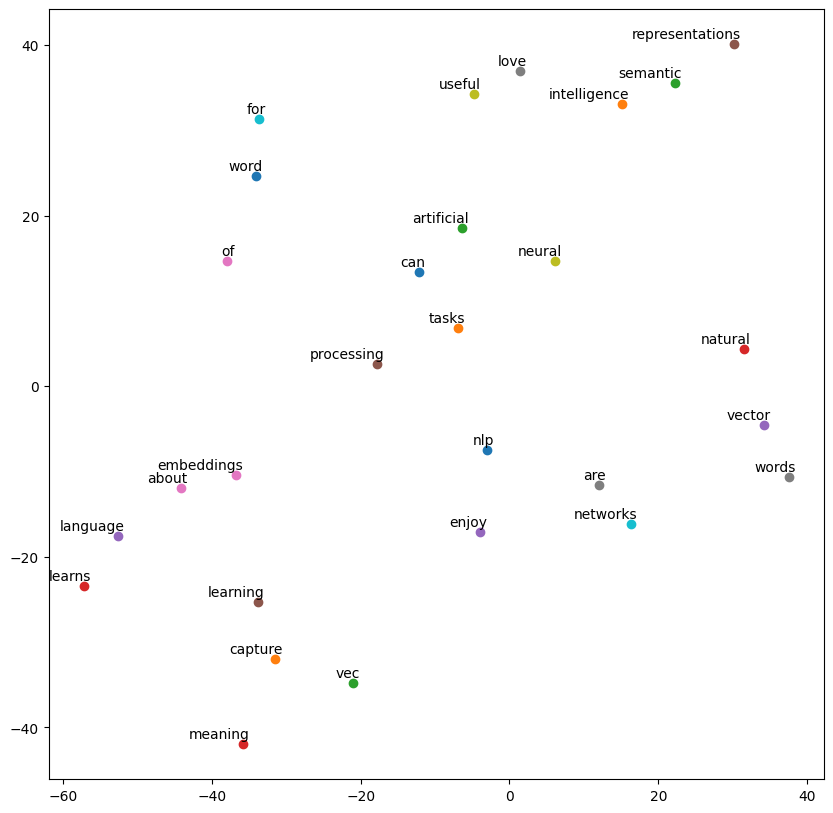

In [12]:
# === Step 5: Visulalization ===
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

vectors = model.wv.vectors # 모델의 단어 벡터들 가져오기
words = list(model.wv.key_to_index.keys()) # 단어들

# tsne : 고차원(100)을 저차원(2)으로 나타내기
tsne_model = TSNE(n_components=2, perplexity=min(5,len(words)-1) , random_state=42) # n_component=2 : 2차원으로 축소, perplexity:비슷한 점을 얼마나 고려할지 , random_state: 실행때마다 동일한 값 얻기 위해
new_vectors = tsne_model.fit_transform(vectors) # 모델 학습 : [x1,y1], [x2,y2] , [x3,y3] 이런식으로 저장됨

# visualize
x = []
y=[]
for value in new_vectors:
  x.append(value[0])
  y.append(value[1])

plt.figure(figsize=(10,10))
for i in range(len(x)):
  plt.scatter(x[i],y[i])
  plt.annotate(words[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

